In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Hybrid image
## We first read the images and save its 3D array as 3 2D arrays that contain R, G and B of each of the images

In [2]:
near = cv2.imread('./pics/near03.jpg')
far = cv2.imread('./pics/far04.jpg')

near_blue = near[:,:,0]
far_blue = far[:,:,0]

near_green = near[:,:,1]
far_green = far[:,:,1]

near_red = near[:,:,2]
far_red = far[:,:,2]

## Now we get both images DFT

In [3]:
# Blue 
near_f_blue = np.fft.fft2(near_blue)
near_fshift_blue = np.fft.fftshift(near_f_blue)
near_spectrum_blue = 20 * np.log(np.abs(near_fshift_blue))

far_f_blue = np.fft.fft2(far_blue)
far_fshift_blue = np.fft.fftshift(far_f_blue)
far_spectrum_blue = 20 * np.log(np.abs(far_fshift_blue))

# Green
near_f_green = np.fft.fft2(near_green)
near_fshift_green = np.fft.fftshift(near_f_green)
near_spectrum_green = 20 * np.log(np.abs(near_fshift_green))

far_f_green = np.fft.fft2(far_green)
far_fshift_green = np.fft.fftshift(far_f_green)
far_spectrum_green = 20 * np.log(np.abs(far_fshift_green))

# Red 
near_f_red = np.fft.fft2(near_red)
near_fshift_red = np.fft.fftshift(near_f_red)
near_spectrum_red = 20 * np.log(np.abs(near_fshift_red))

far_f_red = np.fft.fft2(far_red)
far_fshift_red = np.fft.fftshift(far_f_red)
far_spectrum_red = 20 * np.log(np.abs(far_fshift_red))

## Spectrums

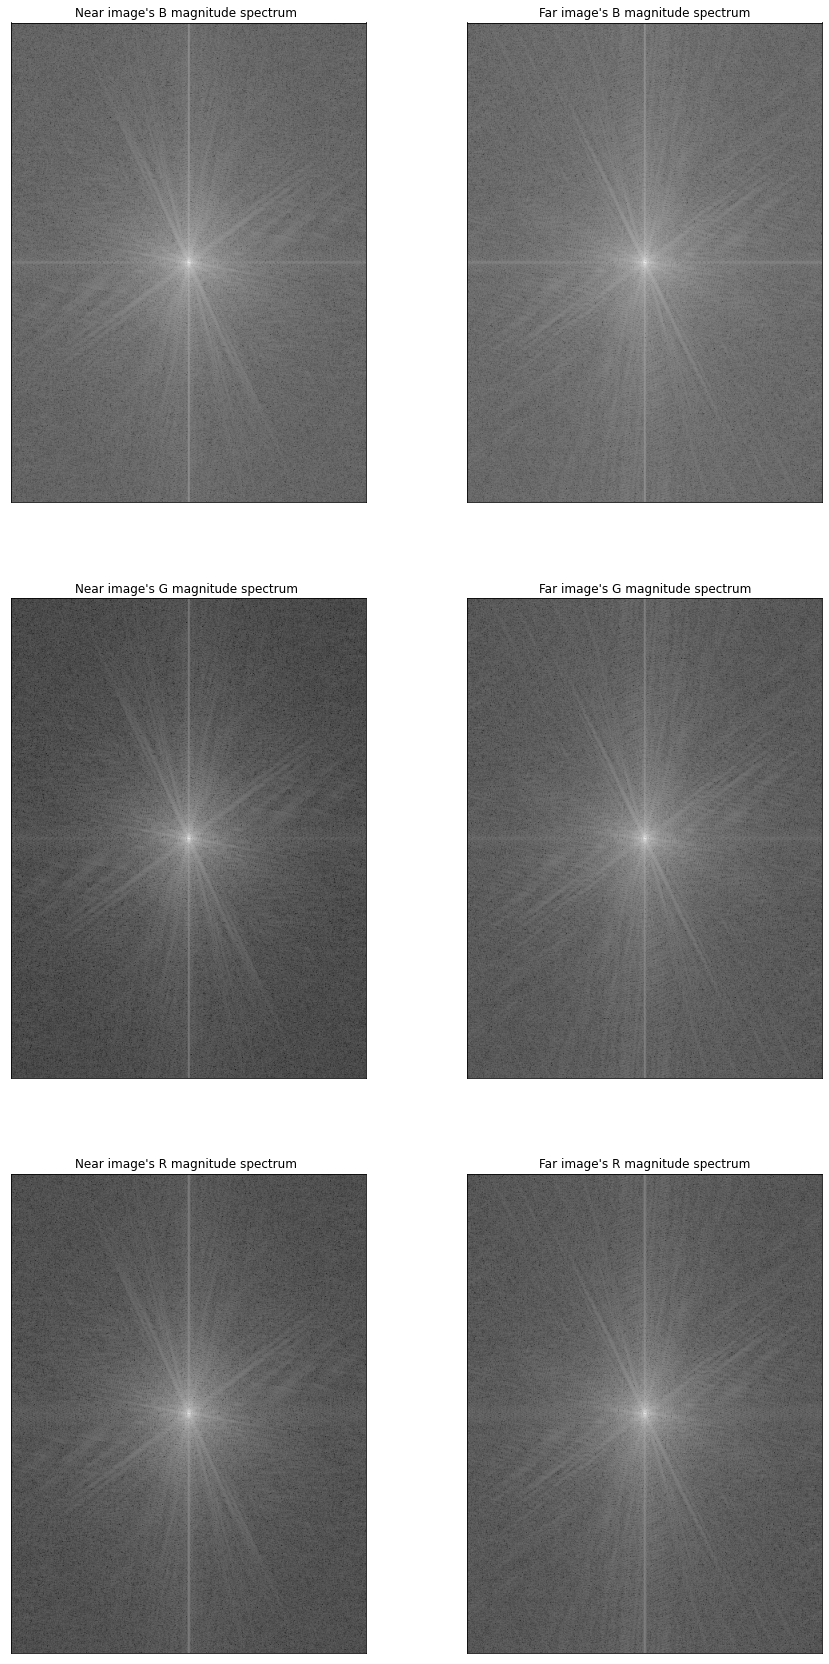

True

In [4]:
plt.figure(figsize = (15,30))
# Blue 
plt.subplot(321)
plt.imshow(near_spectrum_blue, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.title("Near image's B magnitude spectrum ")
plt.subplot(322)
plt.imshow(far_spectrum_blue, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.title("Far image's B magnitude spectrum")
# Green
plt.subplot(323)
plt.imshow(near_spectrum_green, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.title("Near image's G magnitude spectrum ")
plt.subplot(324)
plt.imshow(far_spectrum_green, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.title("Far image's G magnitude spectrum")
# Red 
plt.subplot(325)
plt.imshow(near_spectrum_red, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.title("Near image's R magnitude spectrum ")
plt.subplot(326)
plt.imshow(far_spectrum_red, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.title("Far image's R magnitude spectrum")
plt.show();

cv2.imwrite('./results/q4/near_dft_05_blue.jpg', near_spectrum_blue)
cv2.imwrite('./results/q4/far_dft_06_blue.jpg', far_spectrum_blue)
cv2.imwrite('./results/q4/near_dft_05_green.jpg', near_spectrum_green)
cv2.imwrite('./results/q4/far_dft_06_green.jpg', far_spectrum_green)
cv2.imwrite('./results/q4/near_dft_05_red.jpg', near_spectrum_red)
cv2.imwrite('./results/q4/far_dft_06_red.jpg', far_spectrum_red)

## Defining gaussian filter

In [5]:
def gaussianFilter(row, column, sigma, HighPass = True):
    rowOrigin = int(row/2) + row%2
    columnOrigin = int(column/2) + column%2
    gaussian_filter = np.zeros((row, column))
    for y in range(column):
        for x in range(row):
            G = np.exp(-1.0 * ((x - rowOrigin)**2 + (y - columnOrigin)**2) / (2 * sigma**2))
            gaussian_filter[x][y] = (-1)**HighPass * G + 1 * HighPass
    return gaussian_filter

## Gaussian Filters

Text(0.5, 1.0, 'LowPass Filter')

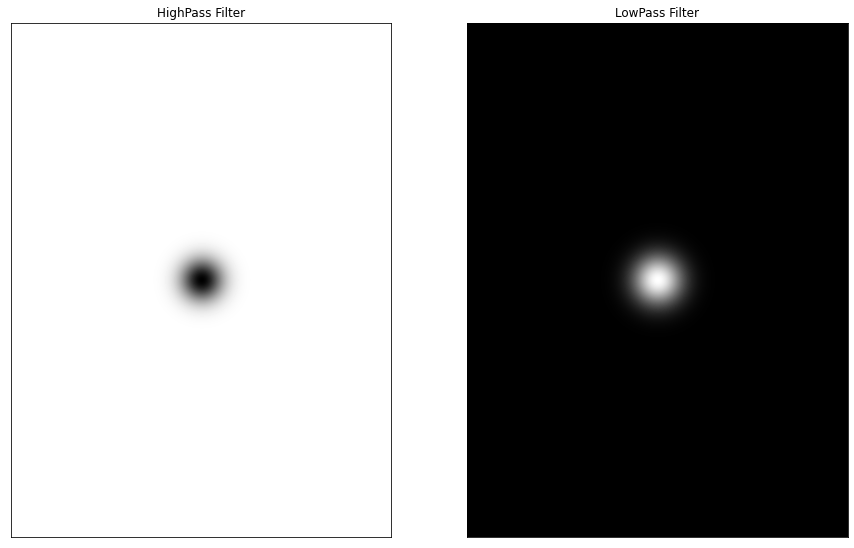

In [6]:
r = 17 #less
s = 20

near_row, near_column = near_fshift_green.shape
far_row, far_column = far_fshift_green.shape
highpass = gaussianFilter(near_row, near_column, r, True)
lowpass = gaussianFilter(far_row, far_column, s, False)
cv2.imwrite('./results/q4/highpass07.jpg', highpass*255)
cv2.imwrite('./results/q4/lowpass08.jpg', lowpass*255)
plt.figure(figsize = (15,10))
plt.subplot(121)
plt.imshow(highpass, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.title("HighPass Filter")
plt.subplot(122)
plt.imshow(lowpass, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.title("LowPass Filter")

## As you can see in the code above, i chose r equal to 17 and s equal to 20

## Defining Cutoff filter

In [7]:
def cutoffFilter(row, column, cutoff, HighPass = True):
    rowOrigin = int(row/2) + row%2
    columnOrigin = int(column/2) + column%2
    cutoff_filter = np.zeros((row, column))
    for y in range(column):
        for x in range(row):
            if ((x - rowOrigin)**2 + (y-columnOrigin)**2 > cutoff**2 ):
                cutoff_filter[x][y] = HighPass * 1
            else:
                cutoff_filter[x][y] = 1 - HighPass * 1
            
    return cutoff_filter

Text(0.5, 1.0, 'LowPass Cutoffed Filter')

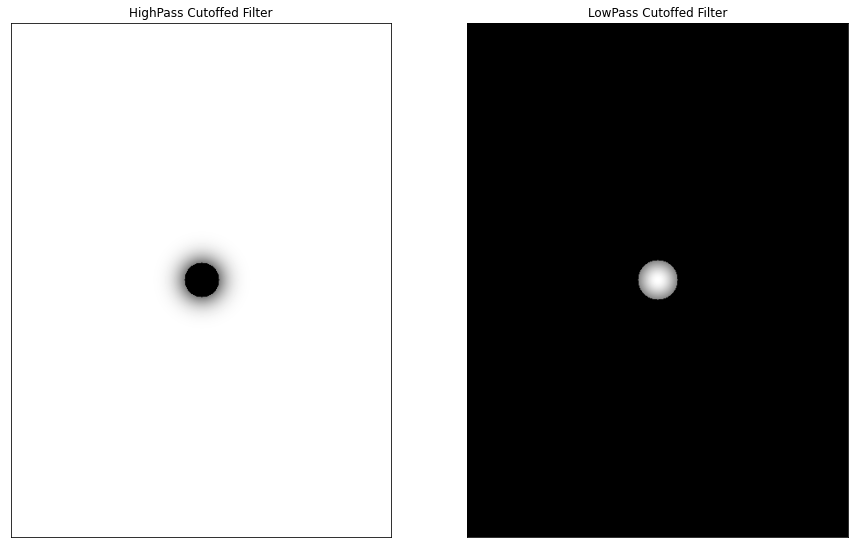

In [8]:
ratio = 1/2
highpass_cutoff = int(np.sqrt(np.log(1/ratio) * 2 * r**2))
lowpass_cutoff = int(np.sqrt(np.log(1/ratio) * 2 * s**2))
#highpass_cutoff = 16
#lowpass_cutoff = 24
highpass = highpass * cutoffFilter(near_row, near_column,highpass_cutoff, True)
lowpass = lowpass * cutoffFilter(far_row, far_column, lowpass_cutoff, False)
plt.figure(figsize = (15,10))
plt.subplot(121)
plt.imshow(highpass, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.title("HighPass Cutoffed Filter")
plt.subplot(122)
plt.imshow(lowpass, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.title("LowPass Cutoffed Filter")

## Applying filters

In [9]:
highpassed_blue = near_fshift_blue * highpass
lowpassed_blue = far_fshift_blue * lowpass

highpassed_spectrum_blue = 20 * np.log(np.abs(highpassed_blue))
lowpassed_spectrum_blue = 20 * np.log(np.abs(lowpassed_blue))

highpassed_green = near_fshift_green * highpass
lowpassed_green = far_fshift_green * lowpass

highpassed_spectrum_green = 20 * np.log(np.abs(highpassed_green))
lowpassed_spectrum_green = 20 * np.log(np.abs(lowpassed_green))

highpassed_red = near_fshift_red * highpass
lowpassed_red = far_fshift_red * lowpass

highpassed_spectrum_red = 20 * np.log(np.abs(highpassed_red))
lowpassed_spectrum_red = 20 * np.log(np.abs(lowpassed_red))

cv2.imwrite('./results/q4/highpassed09_green.jpg', highpassed_spectrum_green)
cv2.imwrite('./results/q4/lowpassed010_green.jpg', lowpassed_spectrum_green)

cv2.imwrite('./results/q4/highpassed09_blue.jpg', highpassed_spectrum_blue)
cv2.imwrite('./results/q4/lowpassed010_blue.jpg', lowpassed_spectrum_blue)

cv2.imwrite('./results/q4/highpassed09_red.jpg', highpassed_spectrum_red)
cv2.imwrite('./results/q4/lowpassed010_red.jpg', lowpassed_spectrum_red)

<ipython-input-9-da3299be4e68>:4: RuntimeWarning: divide by zero encountered in log
  highpassed_spectrum_blue = 20 * np.log(np.abs(highpassed_blue))
<ipython-input-9-da3299be4e68>:5: RuntimeWarning: divide by zero encountered in log
  lowpassed_spectrum_blue = 20 * np.log(np.abs(lowpassed_blue))
<ipython-input-9-da3299be4e68>:10: RuntimeWarning: divide by zero encountered in log
  highpassed_spectrum_green = 20 * np.log(np.abs(highpassed_green))
<ipython-input-9-da3299be4e68>:11: RuntimeWarning: divide by zero encountered in log
  lowpassed_spectrum_green = 20 * np.log(np.abs(lowpassed_green))
<ipython-input-9-da3299be4e68>:16: RuntimeWarning: divide by zero encountered in log
  highpassed_spectrum_red = 20 * np.log(np.abs(highpassed_red))
<ipython-input-9-da3299be4e68>:17: RuntimeWarning: divide by zero encountered in log
  lowpassed_spectrum_red = 20 * np.log(np.abs(lowpassed_red))


True

## Finding the Final Hybrid Image

In [10]:
hybrid_blue = (highpassed_blue * 0.5 + lowpassed_blue) / (highpass * 0.5 + lowpass)
hybrid_spectrum_blue = 20 * np.log(np.abs(hybrid_blue))
cv2.imwrite('./results/q4/frequency_hybrid11_blue.jpg', hybrid_spectrum_blue)

hybrid_green = (highpassed_green + lowpassed_green) / (highpass + lowpass)
hybrid_spectrum_green = 20 * np.log(np.abs(hybrid_green))
cv2.imwrite('./results/q4/frequency_hybrid11_green.jpg', hybrid_spectrum_green)

hybrid_red = (highpassed_red + lowpassed_red) / (highpass + lowpass)
hybrid_spectrum_red = 20 * np.log(np.abs(hybrid_red))
cv2.imwrite('./results/q4/frequency_hybrid11_red.jpg', hybrid_spectrum_red)

hybrid_ishift_blue = np.fft.ifftshift(hybrid_blue)
hybrid_ishift_green = np.fft.ifftshift(hybrid_green)
hybrid_ishift_red = np.fft.ifftshift(hybrid_red)

hybrid_back_blue = np.abs(np.fft.ifft2(hybrid_ishift_blue))
hybrid_back_green = np.abs(np.fft.ifft2(hybrid_ishift_green))
hybrid_back_red = np.abs(np.fft.ifft2(hybrid_ishift_red))

final_near = np.zeros((near_row, near_column, 3))
final_near[:,:,0] = hybrid_back_blue
final_near[:,:,1] = hybrid_back_green
final_near[:,:,2] = hybrid_back_red

width = int(final_near.shape[1] /5)
height = int(final_near.shape[0] /5)

final_far = cv2.resize(final_near, (width, height))

width = int(final_near.shape[1]*1.2)
height = int(final_near.shape[0]*1.2)

final_near = cv2.resize(final_near, (width, height))

cv2.imwrite('./results/q4/final_near.jpg', final_near)
cv2.imwrite('./results/q4/final_far.jpg', final_far)

True